In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import keras
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.resnet import ResNet152
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from keras import regularizers
from keras import models
from keras.models import load_model
import cv2

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
data = pd.read_csv('/content/drive/MyDrive/LogoAi/X_train.csv')
data

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874
0,0,0.994703,0.992144,1.000000,0.994476,0.991793,0.999991,0.992602,0.988630,0.999771,...,1.000000,0.994275,0.991509,1.000000,0.994711,0.992157,1.000000,0.994711,0.992157,1.000000
1,1,0.977989,0.771353,0.037531,0.942589,0.763269,0.045961,0.929515,0.758163,0.043698,...,0.010530,0.954491,0.746322,0.004454,0.983107,0.767625,0.011123,0.993709,0.774269,0.023855
2,2,0.038053,0.080247,0.060924,0.058949,0.097848,0.080129,0.075435,0.111619,0.095807,...,0.056637,0.027127,0.070935,0.052346,0.025596,0.068991,0.049897,0.027017,0.070334,0.051068
3,3,0.457018,0.555018,0.487625,0.472140,0.564398,0.517457,0.472304,0.565487,0.517554,...,0.345072,0.378867,0.535743,0.342594,0.388676,0.515267,0.357123,0.416573,0.535325,0.414758
4,4,0.244195,0.086490,0.208606,0.244961,0.085324,0.209604,0.246804,0.085679,0.211291,...,0.255012,0.281013,0.113894,0.247708,0.273905,0.115740,0.241846,0.278870,0.118644,0.246646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77215,77215,0.775964,0.692392,0.786164,0.738510,0.663206,0.748928,0.643853,0.579368,0.654275,...,0.574711,0.635328,0.569880,0.649549,0.717577,0.646121,0.732114,0.758552,0.683654,0.774564
77216,77216,0.274617,0.754888,0.532682,0.285859,0.757757,0.540060,0.297347,0.757927,0.545051,...,0.593756,0.302629,0.827297,0.580116,0.327104,0.794901,0.570486,0.325284,0.792724,0.567153
77217,77217,0.836031,0.516674,0.282345,0.830841,0.514937,0.266088,0.822976,0.511609,0.252485,...,0.355576,0.851146,0.564696,0.353269,0.871837,0.588004,0.367354,0.890942,0.616794,0.416086
77218,77218,0.105882,0.109804,0.109804,0.101961,0.109804,0.105882,0.098039,0.105882,0.101961,...,0.062745,0.073333,0.078431,0.081176,0.113725,0.121490,0.129412,0.066667,0.070588,0.070588


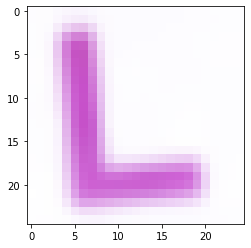

In [49]:
plt.imshow(np.array(ximg*255,dtype=np.uint16))

# Rescaling the Image

In [107]:
Images = []
for d in range(data.shape[0]):
  img = data.iloc[d,0:]*255
  img = np.array(img,dtype=np.uint16)
  img = np.resize(img,(25,25,3))
  Images.append(img)
  print("Images Processed: {}".format(d))
  clear_output(wait=True)



Images Processed: 77219


In [108]:
New_Images = np.asarray(Images)

In [109]:
np.save('/content/drive/MyDrive/LogoAi/images.npy',New_Images)

In [8]:
Images = np.load('/content/drive/MyDrive/LogoAi/images.npy')

In [8]:
Images.shape

(77220, 25, 25, 3)

In [9]:
Target_values = pd.read_csv('/content/drive/MyDrive/LogoAi/y_train.csv')

In [10]:
Target_values = np.asarray(Target_values['0'])

In [11]:
Target_values

array([11, 19,  0, ...,  2, 25, 16])

# Adding Padding into Images

In [12]:
# #adding padding into images
# Padded_Images = []
# border = 32-25
# for i,img in enumerate(Images):
#   Padded_Images.append(cv2.copyMakeBorder(img,4,3,4,3,cv2.BORDER_CONSTANT,value=[255,255,255]))
#   # if i==10:
#   #   break
#   print("Images Processed: {}".format(i))
#   clear_output(wait=True)


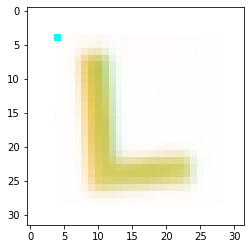

In [12]:
#padded img
plt.imshow(Padded_Images[0])

In [13]:
# Padded_Images[0].shape

(32, 32, 3)

In [14]:
np.save('/content/drive/MyDrive/LogoAi/Paddedimages.npy',np.asarray(Padded_Images))

In [15]:
Padded_Images = np.load('/content/drive/MyDrive/LogoAi/Paddedimages.npy')

In [13]:
validation_split = int(Target_values.shape[0] * 0.20)
Xtrain = Images[0:validation_split]
ytrain = Target_values[0:validation_split]
#--------------
xval = Images[validation_split:]
yval = Target_values[validation_split:]


In [14]:
Xtrain.shape,ytrain.shape,xval.shape,yval.shape

((15444, 25, 25, 3), (15444,), (61776, 25, 25, 3), (61776,))

In [48]:
# Network = ResNet152(weights='imagenet',
# include_top=False,
# input_shape=(32, 32, 3))

# print(Network.summary())

234708992/234698864 [==============================] - 3s 0us/step
Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                       

In [15]:

model = models.Sequential()
model.add(Conv2D(60, (3, 3), activation='relu', input_shape=(25, 25, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(70, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(26, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 60)        1680      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 60)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 70)          37870     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 70)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 4, 70)          0         
                                                                 
 flatten (Flatten)           (None, 1120)              0

In [79]:
# # Make last block of the conv_base trainable:

# for layer in Network.layers[:60]:
#    layer.trainable = False
# for layer in Network.layers[60:]:
#    layer.trainable = True

# print('Last block of the conv_base is now trainable')

Last block of the conv_base is now trainable


In [16]:
import keras 
model.compile(optimizer='Adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

print("model compiled")
print(model.summary())

model compiled
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 60)        1680      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 60)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 70)          37870     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 70)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 4, 70)          0         
                                                                 
 flatten (Flatten)           (None, 1120)

In [22]:
model.fit(Xtrain/255,ytrain, epochs = 154, validation_data=(xval/255, yval), batch_size = 100)

Epoch 1/154
155/155 [==============================] - 6s 40ms/step - loss: 3.2582 - accuracy: 0.0385 - val_loss: 3.2582 - val_accuracy: 0.0417
Epoch 2/154
155/155 [==============================] - 7s 45ms/step - loss: 3.2539 - accuracy: 0.0434 - val_loss: 3.2352 - val_accuracy: 0.0427
Epoch 3/154
155/155 [==============================] - 5s 32ms/step - loss: 2.0848 - accuracy: 0.3815 - val_loss: 0.7944 - val_accuracy: 0.7679
Epoch 4/154
155/155 [==============================] - 5s 32ms/step - loss: 0.6641 - accuracy: 0.7979 - val_loss: 0.4341 - val_accuracy: 0.8728
Epoch 5/154
155/155 [==============================] - 5s 32ms/step - loss: 0.4427 - accuracy: 0.8698 - val_loss: 0.3506 - val_accuracy: 0.8980
Epoch 6/154
155/155 [==============================] - 7s 45ms/step - loss: 0.3497 - accuracy: 0.8941 - val_loss: 0.2840 - val_accuracy: 0.9165
Epoch 7/154
155/155 [==============================] - 5s 32ms/step - loss: 0.2952 - accuracy: 0.9106 - val_loss: 0.2498 - val_accuracy:

In [23]:
model.save('/content/drive/MyDrive/LogoAi/model.h5')

In [14]:
!python template.py

loading X train data
tcmalloc: large alloc 1158307840 bytes == 0x56106c86e000 @  0x7fb6cf4351e7 0x7fb6ccdc60ce 0x7fb6cce1ccf5 0x7fb6cce1cf4f 0x7fb6ccebf673 0x560ffa7d811c 0x560ffa7d7ef0 0x560ffa84c64d 0x560ffa7d97aa 0x560ffa8478f6 0x560ffa846a2e 0x560ffa7d988a 0x560ffa848719 0x560ffa7d97aa 0x560ffa8478f6 0x560ffa846a2e 0x560ffa7d988a 0x560ffa848719 0x560ffa846cdd 0x560ffa7d988a 0x560ffa848719 0x560ffa846cdd 0x560ffa7d988a 0x560ffa848719 0x560ffa846cdd 0x560ffa7da13c 0x560ffa81b239 0x560ffa818184 0x560ffa7d89f9 0x560ffa84c937 0x560ffa846a2e
Loading Y train data
Rescaling Train Images
Sample Input: 1
Sample Input: 2
Splitting data into 80:20 percent ratio of train and validation
X train shape: (15444, 25, 25, 3)
X validation shape: (61776, 25, 25, 3)
 target train shape: (15444, 1)
 target validation shape: (61776, 1)
---------------------------------------- Building The Deep Learning Model ----------------------------------------
2022-04-06 19:35:37.596063: E tensorflow/stream_executor/